   Runtime  IMDB Score
0       58         2.5
1       81         2.6
2       79         2.6
3       94         3.2
4       90         3.4


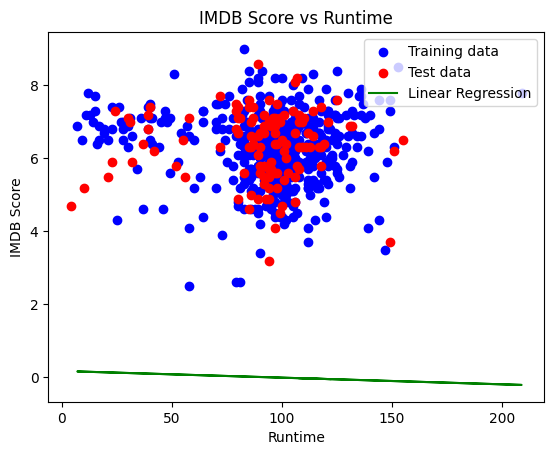

In [ ]:
#linear regression
#focusing on the relationship between the runtime of the movies and their IMDB scores
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/NetflixOriginals.csv', encoding='latin1')

# Select relevant columns
selected_columns = data[["Runtime", "IMDB Score"]]

# Display the first few rows
print(selected_columns.head())

# Prepare the data
X = selected_columns[["Runtime"]]
y = selected_columns[["IMDB Score"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Standardize the features
sc_X = StandardScaler()
X_train_std = sc_X.fit_transform(X_train)
X_test_std = sc_X.transform(X_test)

# Standardize the target variable
sc_y = StandardScaler()
y_train_std = sc_y.fit_transform(y_train)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train_std, y_train_std)

# Make predictions
y_pred_std = lr.predict(X_test_std)
y_pred = sc_y.inverse_transform(y_pred_std)

# Plot the results
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_train, lr.predict(X_train_std), color='green', label='Linear Regression')
plt.title("IMDB Score vs Runtime")
plt.xlabel("Runtime")
plt.ylabel("IMDB Score")
plt.legend()
plt.show()


Mean Squared Error: 0.7747653333333345
Mean Absolute Error: 0.6506153846153856
R2 Score: 0.2535558136817839


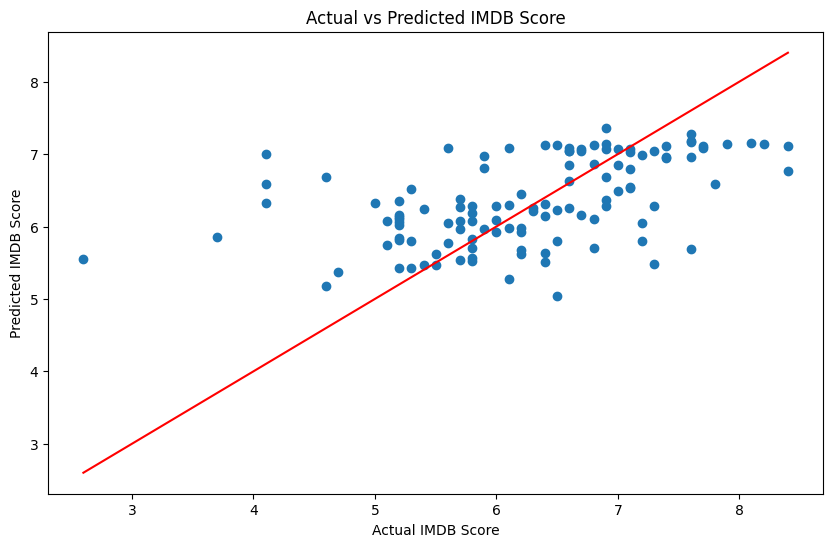

In [ ]:
#Random Forest Regressor
#to predict the IMDB scores of Netflix original movies based on various features such as genre, language, and premiere date.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/NetflixOriginals.csv', encoding='latin1')

# Preprocessing
# Assuming you want to predict IMDB Score based on other features, we'll drop 'IMDB Score' from X
X = data.drop(['IMDB Score', 'Title'], axis=1)
X = pd.get_dummies(X, columns=['Genre', 'Language', 'Premiere'])

# Target variable
y = data['IMDB Score']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual IMDB Score')
plt.ylabel('Predicted IMDB Score')
plt.title('Actual vs Predicted IMDB Score')
plt.show()


In [ ]:
#regression analysis using the K-Nearest Neighbors (KNN) algorithm
#to predict the IMDB scores of Netflix original movies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/NetflixOriginals.csv', encoding='latin1')

# Preprocess the data
data['Premiere'] = pd.to_datetime(data['Premiere'], format='mixed')
data['Premiere_Month'] = data['Premiere'].dt.month
data['Premiere_Year'] = data['Premiere'].dt.year

# Drop irrelevant columns for regression
data.drop(['Title', 'Premiere', 'Language'], axis=1, inplace=True)

# One-hot encode categorical variables
data = pd.get_dummies(data)

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features and target variable
X = data.drop('IMDB Score', axis=1)
y = data['IMDB Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.8257675213675216


Mean Squared Error: 0.8257675213675216


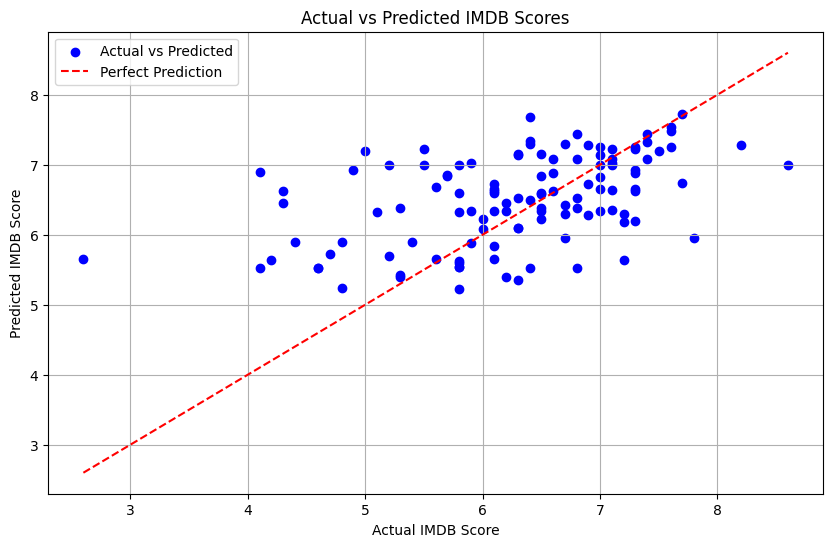

In [ ]:
import matplotlib.pyplot as plt

# Train the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted IMDB Scores')
plt.xlabel('Actual IMDB Score')
plt.ylabel('Predicted IMDB Score')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 1633.068376068376
Mean Absolute Error: 29.358974358974358
R2 Score: -1.2613234733005885


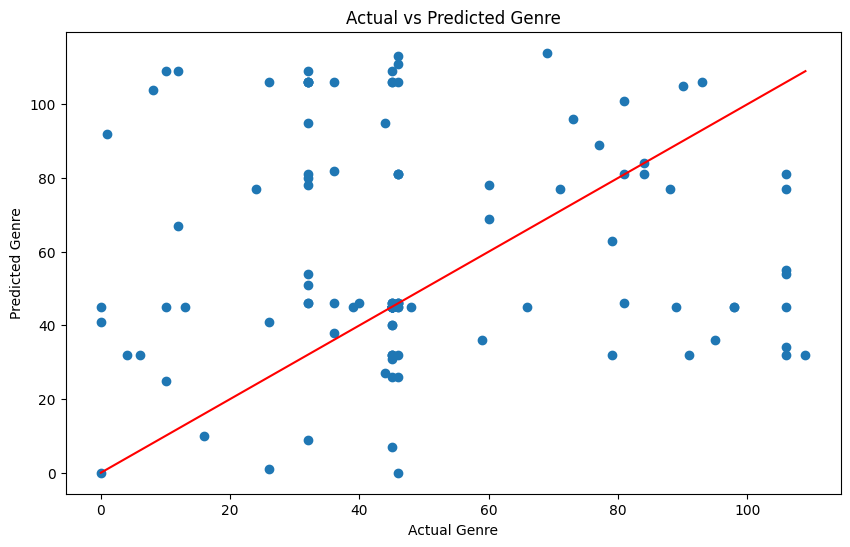

In [ ]:
#Decision Tree Regressor
#to predict the genre of Netflix original movies based on several features such as runtime, IMDB score, and premiere date.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/NetflixOriginals.csv', encoding='latin1')

# Preprocess the data
data['Premiere'] = pd.to_datetime(data['Premiere'], format='mixed')
data['Premiere_Month'] = data['Premiere'].dt.month
data['Premiere_Year'] = data['Premiere'].dt.year



# Select features and target variable
X = data[['Runtime', 'IMDB Score', 'Premiere_Month', 'Premiere_Year']]
y = data['Genre']

# Label encode the target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# Visualize the actual vs. predicted selling prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Genre')
plt.ylabel('Predicted Genre')
plt.title('Actual vs Predicted Genre')
plt.show()


Mean Squared Error: 0.7139222712474882
Mean Absolute Error: 0.6183631449305796
R2 Score: 0.27030362163842325


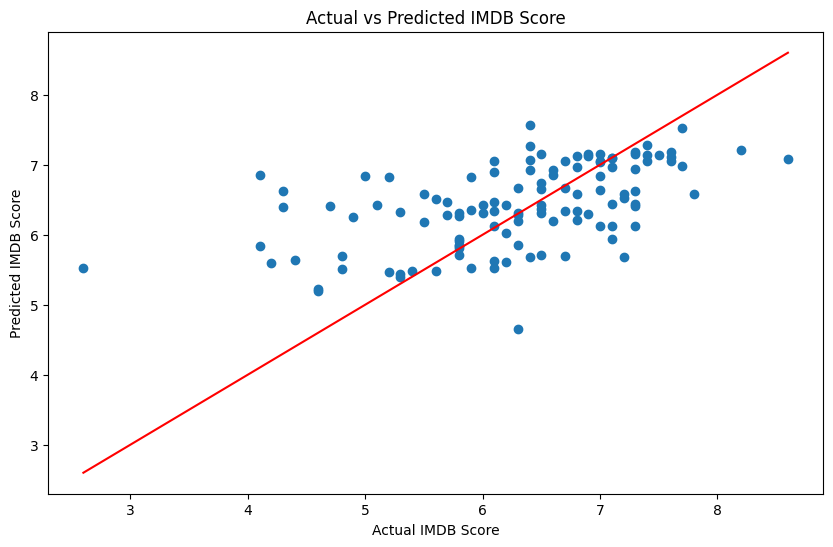

In [ ]:
#Support Vector Regression (SVR)
#to predict the IMDB scores of Netflix original movies based on their genre and runtime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/NetflixOriginals.csv', encoding='latin1')

# Preprocess the data
# Select relevant features and target variable
df = data[['Genre', 'Runtime', 'IMDB Score']]

# One-hot encode categorical variable Genre
df = pd.get_dummies(df, columns=['Genre'])

# Drop rows with missing values
df.dropna(inplace=True)

# Select features and target variable
X = df.drop('IMDB Score', axis=1)
y = df['IMDB Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# Visualize the actual vs. predicted IMDB scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual IMDB Score')
plt.ylabel('Predicted IMDB Score')
plt.title('Actual vs Predicted IMDB Score')
plt.show()
